<a href="https://colab.research.google.com/github/s-j-99/PyTorch_Fundamentals/blob/main/PyTorch03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer vision: Using neural network architectures on image datasets

Some packages to take note of:
1. `torchvision`: contains datasets, models and transformations for CV problems.
2. `torchvision.datasets`: toy datasets and classes for making custom datasets.
3. `torchvision.models`: commonly used architectures.
4. `torchvision.transforms`: image transformations found here.
5. `torch.utils.data.Dataset`: dataset class used in PyTorch.
6. `torch.utils.data.DataLoader`: an iterable that is used to retrieve dataset.

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

# print pytorch version
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")


PyTorch version: 2.0.1+cu118
torchvision version: 0.15.2+cu118


# 1. Load FashionMNIST Dataset
Here we are using the FashionMNIST dataset which contains grayscale images of 10 types of clothing. Thus, this will be a multiclass classification problem, i.e. we want to classify the image based on what type of clothing is being shown.

In [2]:
# Download the dataset

train_data = datasets.FashionMNIST(root="data", # where to download
                                   train=True, # get training data
                                   download=True, # download it to disk
                                   transform=ToTensor(), # turn PIL images to tensors
                                   target_transform=None # this is to transform labels
                                   )

test_data = datasets.FashionMNIST(root="data", # where to download
                                   train=False, # get testing data
                                   download=True, # download it to disk
                                   transform=ToTensor(), # turn PIL images to tensors
                                   target_transform=None # this is to transform labels
                                   )

In [3]:
# preview training data

image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [4]:
image.shape, label

# Since there is only 1 colour channel, the image is grayscale

(torch.Size([1, 28, 28]), 9)

In [5]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [6]:
# What classes are present?

class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# 2. Visualize the data

Text(0.5, 1.0, '9')

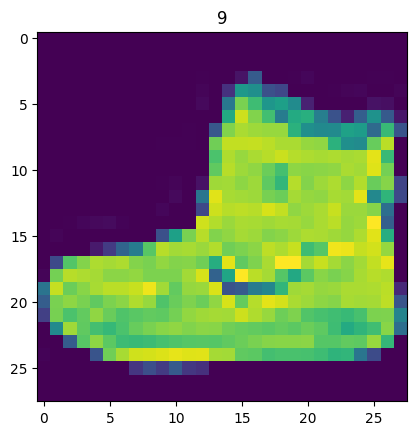

In [7]:
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

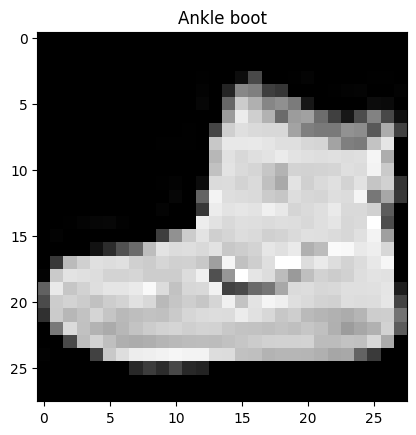

In [8]:
# To visualize in grayscale

plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

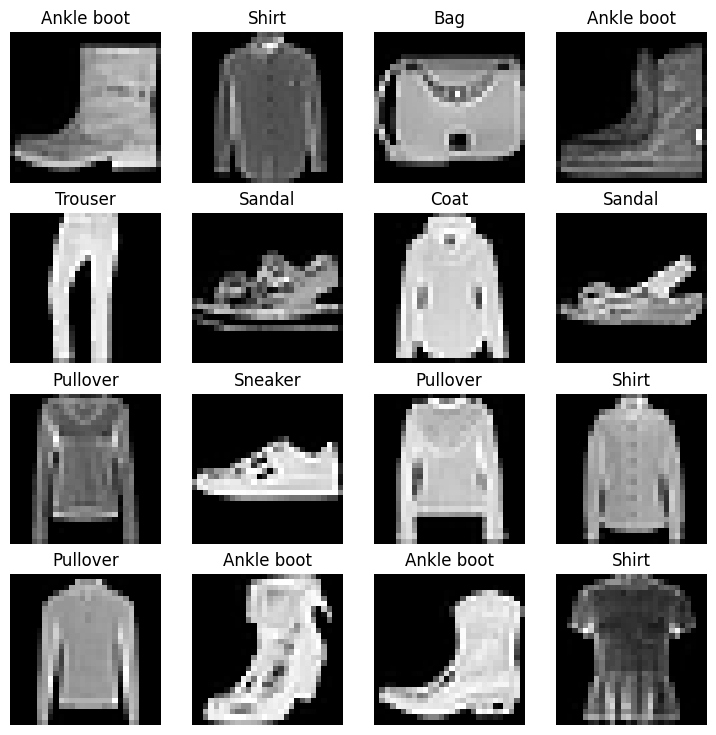

In [9]:
### Plot more random images ###

# Set seed
torch.manual_seed(42)

# Create plot for 16 images
fig = plt.figure(figsize=(9,9))
rows,cols=4,4

# Place one image in individual subplot
for i in range(1,rows*cols+1):
  # get a random index
  rand_ind = torch.randint(0,len(train_data),size=[1]).item()
  # retrieve example using random index
  img, label = train_data[rand_ind]
  # add a subplot in position i (1-based index)
  fig.add_subplot(rows,cols,i)
  # plot the image
  plt.imshow(img.squeeze(),cmap="gray")
  # add the label
  plt.title(class_names[label])
  # remove axes
  plt.axis(False)

# 3. Prepare a DataLoader Class

DataLoader loads data into a model during training and inference. It can reduce a large dataset into smaller batches for efficiency. A good batch-size can be 32, 64, 128, etc. This is a hyperparameter that can be changed.

In [10]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

# convert dataset into an iterable
train_dataloader = DataLoader(train_data, # which dataset to use
                              batch_size=BATCH_SIZE, # number of samples per batch
                              shuffle=True # whether to shuffle data every epoch
                              )

test_dataloader = DataLoader(test_data, # which dataset to use
                              batch_size=BATCH_SIZE, # number of samples per batch
                              shuffle=False # whether to shuffle data every epoch
                              )

print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)}")
print(f"Length of test dataloader: {len(test_dataloader)}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f50e36f7100>, <torch.utils.data.dataloader.DataLoader object at 0x7f50e36f70a0>)
Length of train dataloader: 1875
Length of test dataloader: 313


In [11]:
# Check what's inside the train_dataloader (one example)
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

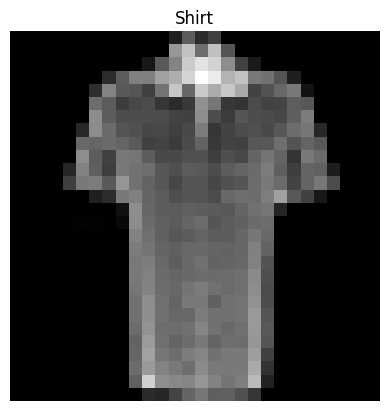

In [12]:
### Show sample ###

# Set seed
torch.manual_seed(42)

# Pick a random index from the first batch
rand_ind = torch.randint(0,len(train_features_batch),size=[1]).item()

# Pick a random example from the first batch
img, label = train_features_batch[rand_ind], train_labels_batch[rand_ind]

# Show the image
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)


# 4. Build a baseline model

In [13]:
#### See what flatten does ####

# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten sample with forward pass
output = flatten_model(x)

print(f"Shape before flattening: {x.shape} --> [colour_channels, height, width]")
print(f"Shape after flattening: {output.shape} --> [colour_channels, height*width]")


Shape before flattening: torch.Size([1, 28, 28]) --> [colour_channels, height, width]
Shape after flattening: torch.Size([1, 784]) --> [colour_channels, height*width]


In [14]:
# Linear layers prefer inputs in the form of long feature vectors

from torch import nn

class FashionMNISTModelV0(nn.Module):
  # input_shape: number of input faetures (flattened)
  # hidden_units: number of neurons in hidden layer
  # output_units: number of classes
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()

    self.layer_stack = nn.Sequential(nn.Flatten(),
                                     nn.Linear(in_features=input_shape,out_features=hidden_units),
                                     nn.Linear(in_features=hidden_units,out_features=output_shape)
                                     )
  def forward(self,x):
    return self.layer_stack(x)

In [15]:
# Instantiate the model

torch.manual_seed(42)

device = "cpu"

model_0 = FashionMNISTModelV0(input_shape=output.shape[1],hidden_units=10,output_shape=len(class_names))

model_0.to(device)

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [16]:
# Setting up loss, optimizer and evaluation functions

import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)


helper_functions.py already exists, skipping download


Import functions to time the models

In [17]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [18]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

Creating a training loop:
1. Loop through epochs
2. Loop through each training batch: train, zero gradients, backpropagation, step the optimizer, calculate loss
3. Loop through each testing batch: forward pass, calculate loss and accuracy
4. Print results
5. Time the process

In [19]:
# To create progress bar
from tqdm.auto import tqdm

# Set seed 
torch.manual_seed(42)

# Start timer
train_time_start_on_cpu = timer()

# Number of epochs
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")

  '''
  Training
  '''
  train_loss = 0

  # Loop through training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()

    # 1. Forward pass
    y_pred = model_0(X.to(device))

    # 2. Calculate loss
    loss = loss_fn(y_pred,y.to(device))
    train_loss += loss

    # 3. Zero the gradients
    optimizer.zero_grad()

    # 4. Backpropagation
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    # Print out how many samples have been seen
    if batch % 400 == 0:
        print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  # Get average loss per batch
  train_loss /= len(train_dataloader)

  '''
  Testing
  '''

  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X.to(device))

      # 2. Calculate loss
      test_loss += loss_fn (test_pred, y.to(device))

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y.to(device),y_pred=test_pred.argmax(dim=1))
    
    # Get average test loss
    test_loss /= len(test_dataloader)

    # Get average test accuracy
    test_acc /= len(test_dataloader)

  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc:{test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc:82.04%

Epoch: 1
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc:83.20%

Epoch: 2
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc:83.43%

Train time on cpu: 44.859 seconds


Evaluate the model by making predictions

In [20]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  '''
  Returns a dictionary containing model predictions
  '''

  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      y_pred = model(X.to(device))
      loss += loss_fn(y_pred, y.to(device))
      acc += accuracy_fn(y_true=y.to(device),y_pred=y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}
model_0_results = eval_model(model=model_0,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)

model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

# 5. Build a non-linear model.

In [21]:
# Switch device to GPU here
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [22]:
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

from torch.utils.data import DataLoader

In [23]:
class FashionMNISTModelV1(nn.Module):
  
  def __init__(self, input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    # Mix of linear and non-linear layers
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [24]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,hidden_units=10,output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [25]:
from helper_functions import accuracy_fn
# Create loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), 
                            lr=0.1)

In [26]:
# Create functions for training and testing

def train_step(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module, optimizer: torch.optim.Optimizer,
               accuracy_fn, device: torch.device=device):
  train_loss, train_acc = 0, 0
  model.to(device)
  model.train()
  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)
    # 1. Forward pass
    y_preds = model(X)
    # 2. Calculate loss
    loss = loss_fn(y_preds, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_preds.argmax(dim=1))
    # 3. Zero the gradients
    optimizer.zero_grad()
    # 4. Backpropagation
    loss.backward()
    # 5. Step the optimizer
    optimizer.step()
    if batch % 400 == 0:
      print(f"{batch*32}/{len(data_loader)*32} samples processed")
  
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Training loss: {train_loss:.5f} | Training accuracy: {train_acc:.2f}%")

def test_step(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module, accuracy_fn, device: torch.device=device):
  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      test_pred = model(X)
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Testing loss: {test_loss:.5f} | Testing accuracy: {test_acc:.2f}%\n")


In [27]:
#### Time to train the model ####

torch.manual_seed(42)
from timeit import default_timer as timer
from tqdm import tqdm
train_time_start_on_gpu = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------------")
  train_step(model=model_1, data_loader=train_dataloader,loss_fn=loss_fn,optimizer=optimizer,accuracy_fn=accuracy_fn)
  test_step(model=model_1, data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu, end=train_time_end_on_gpu, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------------
0/60000 samples processed
12800/60000 samples processed
25600/60000 samples processed
38400/60000 samples processed
51200/60000 samples processed
Training loss: 1.09199 | Training accuracy: 61.34%


 33%|███▎      | 1/3 [00:12<00:25, 12.97s/it]

Testing loss: 0.95636 | Testing accuracy: 65.00%

Epoch: 1
-------------
0/60000 samples processed
12800/60000 samples processed
25600/60000 samples processed
38400/60000 samples processed
51200/60000 samples processed
Training loss: 0.78101 | Training accuracy: 71.93%


 67%|██████▋   | 2/3 [00:26<00:13, 13.19s/it]

Testing loss: 0.72227 | Testing accuracy: 73.91%

Epoch: 2
-------------
0/60000 samples processed
12800/60000 samples processed
25600/60000 samples processed
38400/60000 samples processed
51200/60000 samples processed
Training loss: 0.67027 | Training accuracy: 75.94%


100%|██████████| 3/3 [00:38<00:00, 12.86s/it]

Testing loss: 0.68500 | Testing accuracy: 75.02%

Train time on cuda: 38.598 seconds


In [28]:
# Evaluate the model

model_1_results = eval_model(model=model_1,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

Performance is around the same as, or slightly worse than, linear model. Possibly due to overfitting. This can be resolved by:
1. Using a smaller or different model.
2. Using a larger dataset.
3. Introducing regularization terms.

# 6. Build a Convolutional Neural Network (CNN).

CNNs are better at finding patterns in visual data. The basic unit of a CNN is: [Conv layer -> activation layer -> pooling layer],
and these can be stacked multiple times.

Other types of models:


*   Structured data: gradient boost, random forest, Xgboost
*   Unstructured data: CNNs, Transformers



In [29]:
class FashionMNISTModelV2(nn.Module):
  '''
  Replicating TinyVGG from Github's CNN Explainer.
  '''
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.classifier = nn.Sequential(nn.Flatten(),nn.Linear(in_features=hidden_units*7*7,out_features=output_shape))

  def forward(self, x: torch.Tensor):
    x = self.block_1(x)
    x = self.block_2(x)
    x = self.classifier(x)
    return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,hidden_units=10,output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

Seeing what happens in the convolution

In [30]:
# Test the model with toy data
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]") 
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

What is happening in the `nn.Conv2d()` layer?
Parameters:
1. `in_channels` (`int`): Number of channels in the input image
2. `out_channels` (`int`): Number of channels produced by the convolution
3. `kernel_size` (`int` or `tuple`): Size of the convolving kernel
4. `stride` (`int` or `tuple`, optional): The step size of the kernel. Default is 1.
5. `padding` (`int` or `tuple` or `str`): Number of blank cells added to borders. Default is 0.

Note: Conv layer expects a 4-dimensional tensor in the form of [`batch_size`, `color_channels`, `height`, `width`] so use `unsqueeze(dim=0)` to add an extra dimension to test image.

In [31]:
torch.manual_seed(42)

# baseline
conv_layer = nn.Conv2d(in_channels=3,out_channels=10,kernel_size=3,stride=1,padding=0)

print(conv_layer(test_image.unsqueeze(dim=0)).shape)

# changed out_channels to 5
conv_layer = nn.Conv2d(in_channels=3,out_channels=5,kernel_size=3,stride=1,padding=0)

print(conv_layer(test_image.unsqueeze(dim=0)).shape)

# changed kernel_size to 4
conv_layer = nn.Conv2d(in_channels=3,out_channels=10,kernel_size=4,stride=1,padding=0)

print(conv_layer(test_image.unsqueeze(dim=0)).shape)

# changed stride to 2
conv_layer = nn.Conv2d(in_channels=3,out_channels=10,kernel_size=3,stride=2,padding=0)

print(conv_layer(test_image.unsqueeze(dim=0)).shape)

# changed padding to 1
conv_layer = nn.Conv2d(in_channels=3,out_channels=10,kernel_size=3,stride=1,padding=1)

print(conv_layer(test_image.unsqueeze(dim=0)).shape)

torch.Size([1, 10, 62, 62])
torch.Size([1, 5, 62, 62])
torch.Size([1, 10, 61, 61])
torch.Size([1, 10, 31, 31])
torch.Size([1, 10, 64, 64])


In [32]:
# This shows tensor corresponding to [out_channels, in_channels, kernel_size, kernel_size]
print(f"conv_layer weight shape: \n{conv_layer.weight.shape}")
# This shows tensor corresponding to [out_channels]
print(f"conv_layer bias shape: \n{conv_layer.bias.shape}")

conv_layer weight shape: 
torch.Size([10, 3, 3, 3])
conv_layer bias shape: 
torch.Size([10])


What happens in `nn.MaxPool2d()`? The size of the last two dimensions is halved, and the maximum value of each sliding window (kernel) is kept.

In [33]:
conv_layer = nn.Conv2d(in_channels=3,out_channels=10,kernel_size=3,stride=1,padding=0)
max_pool_layer = nn.MaxPool2d(kernel_size=2)
test_conv_layer=conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after convolution: {test_conv_layer.shape}")
test_pool_layer = max_pool_layer(test_conv_layer)
print(f"Shape after MaxPool2d: {test_pool_layer.shape}")

Shape after convolution: torch.Size([1, 10, 62, 62])
Shape after MaxPool2d: torch.Size([1, 10, 31, 31])


Set up loss function and optimizer.

In [34]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.1)

In [35]:
torch.manual_seed(42)

from timeit import default_timer as timer

train_time_start_model_2 = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  train_step(data_loader=train_dataloader,model=model_2,loss_fn=loss_fn,optimizer=optimizer, accuracy_fn=accuracy_fn,device=device)
  test_step(data_loader=test_dataloader,model=model_2,loss_fn=loss_fn,accuracy_fn=accuracy_fn,device=device)

train_time_end_model_2 = timer()

total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

total_train_time_model_2

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
0/60000 samples processed
12800/60000 samples processed
25600/60000 samples processed
38400/60000 samples processed
51200/60000 samples processed
Training loss: 0.59322 | Training accuracy: 78.48%


 33%|███▎      | 1/3 [00:14<00:29, 15.00s/it]

Testing loss: 0.39874 | Testing accuracy: 85.62%

Epoch: 1
--------
0/60000 samples processed
12800/60000 samples processed
25600/60000 samples processed
38400/60000 samples processed
51200/60000 samples processed
Training loss: 0.36286 | Training accuracy: 86.85%


 67%|██████▋   | 2/3 [00:30<00:15, 15.02s/it]

Testing loss: 0.35197 | Testing accuracy: 87.14%

Epoch: 2
--------
0/60000 samples processed
12800/60000 samples processed
25600/60000 samples processed
38400/60000 samples processed
51200/60000 samples processed
Training loss: 0.32449 | Training accuracy: 88.23%


100%|██████████| 3/3 [00:44<00:00, 14.79s/it]

Testing loss: 0.32613 | Testing accuracy: 87.99%

Train time on cuda: 44.373 seconds


44.373190584999975

In [36]:
model_2_results = eval_model(model=model_2,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)

model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32613053917884827,
 'model_acc': 87.98921725239616}

# 7. Comparing the results of all models.

In [37]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,model_1_results,model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.326131,87.989217


In [38]:
compare_results["training_time"] = [total_train_time_model_0,total_train_time_model_1,total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,44.858881
1,FashionMNISTModelV1,0.685001,75.019968,38.597625
2,FashionMNISTModelV2,0.326131,87.989217,44.373191


Text(0, 0.5, 'model')

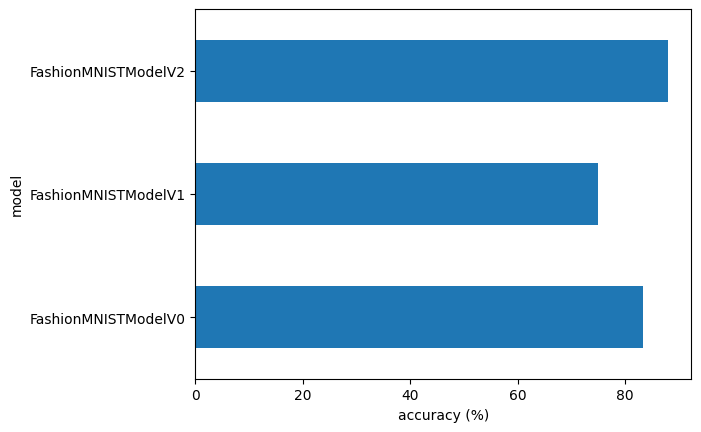

In [39]:
# Visualize results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

# 8. Make random predictions with the best model.

In [40]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device=device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    # data is a list of samples
    for sample in data:
      # add extra dimension to sample
      sample = torch.unsqueeze(sample,dim=0).to(device)
      # forward pass to get prediction score
      pred_logit = model(sample)
      # convert to prediction probability
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)
      # Keep prediction probabilities
      pred_probs.append(pred_prob.cpu())
  # convert list to tensor
  return torch.stack(pred_probs)

In [42]:
# Get random samples of data

import random

random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

print(f"Test sample image shape: {test_samples[0].shape}")
print(f"Test sample label: {test_labels[0]}, {class_names[test_labels[0]]}")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5, Sandal


In [44]:
# Make predictions

pred_probs = make_predictions(model=model_2,data=test_samples)

# Each sample has 10 probabilities, one for each class
pred_probs[:2].shape

torch.Size([2, 10])

In [45]:
# Convert prediction probabilities into labels of most probable class
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

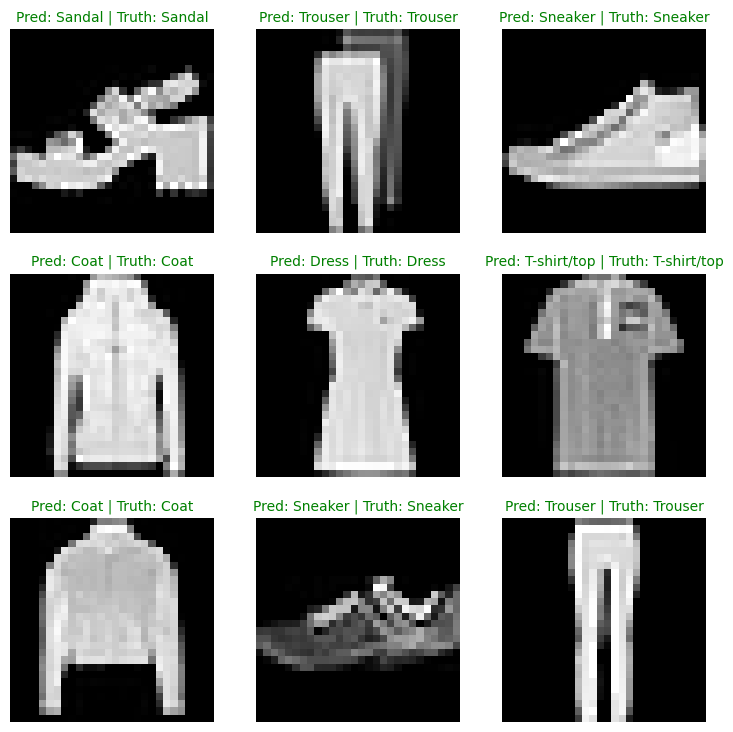

In [47]:
# Plot predictions

plt.figure(figsize=(9,9))
nrows, ncols = 3, 3

for i, sample in enumerate(test_samples):
  # Assign subplot position
  plt.subplot(nrows,ncols,i+1)
  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")
  # Find the predicted label
  pred_label = class_names[pred_classes[i]]
  # Get the true label
  truth_label = class_names[test_labels[i]]
  # Add title
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  # Change title colour according to the correctness of prediction
  if pred_label == truth_label:
    plt.title(title_text,fontsize=10,c="g")
  else:
    plt.title(title_text,fontsize=10,c="r")
  plt.axis(False)

# 9. Plot a confusion matrix of results.

In [48]:
from tqdm.auto import tqdm

# Make predictions
y_preds = []
model_2.eval()

with torch.inference_mode():
  for X, y in tqdm(test_dataloader,desc="Making predictions"):
    # Send data to device
    X, y = X.to(device), y.to(device)
    # Forward pass to get prediction scores
    y_logits = model_2(X)
    # Get prediction probabilities
    y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)
    # Store the predictions
    y_preds.append(y_pred.cpu())

# Convert list to tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [49]:
# Download torchmetrics

try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 71.9 MB/s eta 0:00:00
mlxtend version: 0.22.0


In [50]:
# Import mlxtend upgraded version
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.22.0


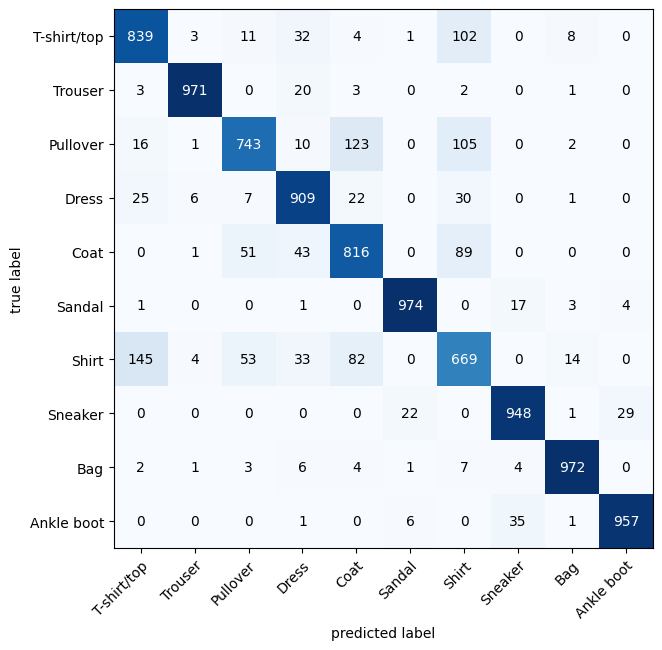

In [52]:
# Create a confusion matrix

from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names),task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,target=test_data.targets)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),class_names=class_names,figsize=(10,7))

# 10. Save the model.

In [53]:
from pathlib import Path

# Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


# 11. Load the saved model.

In [55]:
loaded_model_2 = FashionMNISTModelV2(input_shape=1,hidden_units=10,output_shape=10)

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2 = loaded_model_2.to(device)

In [56]:
# Evaluate the model

torch.manual_seed(42)

loaded_model_2_results = eval_model(model=loaded_model_2,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32613053917884827,
 'model_acc': 87.98921725239616}

In [57]:
# Find out if two tensors are close to each other 

torch.isclose(torch.tensor(model_2_results["model_loss"]), 
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)